For your database, you should download and install the appropriate version

of the Chinook database for your RDBMS, which is available here, under the

downloads tab: https://chinookdatabase.codeplex.com/

The above link did not work for me.

## Executing an SQL Script to Populate a SQLite Database

Execute an SQL script to populate a SQLite database using Python. The SQL script is read from a file and executed to create or update the database.

### Libraries Used
- **sqlite3**: The built-in Python library used for interacting with SQLite databases.

### Steps:

1. **Setting Up the Database Connection**:
   - We specify the path to the SQLite database (`chinook.db`) using `sqlite3.connect()`. If the database does not exist, it will be created automatically.

2. **Reading the SQL Script**:
   - The SQL script (`Chinook_Sqlite.sql`) is read from a file using Python’s `open()` function with `utf-8` encoding. The contents of the script are stored in the `sql_script` variable.

3. **Executing the SQL Script**:
   - The `executescript()` method is used to execute the entire SQL script. This method can execute multiple SQL commands from a single string (such as table creation, data insertion, etc.).

4. **Error Handling**:
   - A `try` block is used to catch any potential errors during the database connection and script execution. If an error occurs, it is caught and printed as a message.

5. **Closing the Connection**:
   - Finally, the database connection is closed using `connection.close()` to ensure that resources are freed and the connection is properly terminated.

In [4]:
import sqlite3

# Specify the path to your SQL file
sql_file_path = 'Chinook_Sqlite.sql'

# Connect to (or create) the SQLite database
db_path = 'chinook.db'
connection = sqlite3.connect(db_path)

try:
    with connection:
        # Open and read the SQL file with specified encoding
        with open(sql_file_path, 'r', encoding='utf-8') as sql_file:
            sql_script = sql_file.read()
        
        # Execute the SQL script
        connection.executescript(sql_script)
        print("SQL script executed successfully.")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the connection
    connection.close()

SQL script executed successfully.


## Querying Data from SQLite Database using Python

This example demonstrates how to use Python to query data from an SQLite database and load it into a pandas DataFrame.

### Libraries Used
- **sqlite3**: This is the built-in Python library for interacting with SQLite databases.
- **pandas**: This library is used for data manipulation and analysis. It allows for loading SQL query results directly into a DataFrame for easy manipulation and analysis.

### Steps:

1. **Establishing a Database Connection**:
   We start by connecting to the `chinook.db` SQLite database using `sqlite3.connect()`. The path to the database file is provided in the `db_path` variable.

2. **Defining the SQL Query**:
   The SQL query is defined to retrieve a list of customers along with the names of tracks and albums they have purchased. The query involves multiple JOIN operations to link the relevant tables (`Customer`, `Invoice`, `InvoiceLine`, `Track`, and `Album`), and the results are ordered by the customer's last name and first name.

   ```sql
   SELECT
       Customer.LastName,
       Customer.FirstName,
       Track.Name AS TrackName,
       Album.Title AS AlbumTitle
   FROM Customer
   JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId
   JOIN InvoiceLine ON Invoice.InvoiceId = InvoiceLine.InvoiceId
   JOIN Track ON InvoiceLine.TrackId = Track.TrackId
   JOIN Album ON Track.AlbumId = Album.AlbumId
   ORDER BY Customer.LastName, Customer.FirstName;


In [ ]:
import sqlite3
import pandas as pd

# Connect to the Chinook database
db_path = 'chinook.db'  # Path points to your database file
connection = sqlite3.connect(db_path)

# Define the SQL query
query = """
SELECT
    Customer.LastName,
    Customer.FirstName,
    Track.Name AS TrackName,
    Album.Title AS AlbumTitle
FROM Customer
JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId
JOIN InvoiceLine ON Invoice.InvoiceId = InvoiceLine.InvoiceId
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Album ON Track.AlbumId = Album.AlbumId
ORDER BY Customer.LastName, Customer.FirstName;
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Display the first five rows
print(df.head())

# Close the connection
connection.close()

  LastName FirstName                                          TrackName  \
0  Almeida   Roberto                            Right Next Door to Hell   
1  Almeida   Roberto                                     In The Evening   
2  Almeida   Roberto                                   Fool In The Rain   
3  Almeida   Roberto  Saudade Dos Aviões Da Panair (Conversando No Bar)   
4  Almeida   Roberto                             Caso Você Queira Saber   

                AlbumTitle  
0      Use Your Illusion I  
1  In Through The Out Door  
2  In Through The Out Door  
3                    Minas  
4                    Minas  


## Displaying Data in a Table Using pandas and PrettyTable

This example demonstrates how to use `pandas` to load data and display the first few rows in a table format using the `PrettyTable` library for clean and readable command-line output.

### Libraries Used
- **pandas**: A powerful library for data manipulation and analysis in Python. It allows easy handling of tabular data.
- **PrettyTable**: A library to format and display tabular data in a clean, readable format in the command line.

### Steps:

1. **Load Data into pandas DataFrame**:
   - You load your data into a `pandas` DataFrame. In this case, you can use any DataFrame, and for this example, we'll assume that the DataFrame is already loaded as `df`.

2. **Selecting the First Few Rows**:
   - The `head()` method is used to retrieve the first five rows of the DataFrame. You can adjust the number of rows by passing a parameter to `head()`. For example, `df.head(5)` will retrieve the first five rows.

3. **Displaying Data with PrettyTable**:
   - `PrettyTable` is used to format the `head()` data into a table format that is suitable for command-line display. The column names from the DataFrame are extracted and used as the headers in the `PrettyTable`.

4. **Displaying the Table**:
   - Once the `PrettyTable` is created and populated with the data, it is displayed in the console.

### Complete Python Code:

In [13]:
import pandas as pd
from prettytable import PrettyTable
df.head(5)

,LastName,FirstName,TrackName,AlbumTitle
0,Almeida,Roberto,Right Next Door to Hell,Use Your Illusion I
1,Almeida,Roberto,In The Evening,In Through The Out Door
2,Almeida,Roberto,Fool In The Rain,In Through The Out Door
3,Almeida,Roberto,Saudade Dos Aviões Da Panair (Conversando No Bar),Minas
4,Almeida,Roberto,Caso Você Queira Saber,Minas


## Visualizing Foreign Key Relationships in a SQLite Database

In this example we demonstrate how to visualize the foreign key relationships between tables in an SQLite database using Python. It uses the `networkx` library to create a directed graph (ERD) and `matplotlib` for displaying the graph.

### Libraries Used
- **sqlite3**: A built-in Python library for working with SQLite databases.
- **networkx**: A library for creating and manipulating complex networks (graphs).
- **matplotlib**: A plotting library for creating static, animated, and interactive visualizations.

### Steps:

1. **Connecting to the SQLite Database**:
   - We establish a connection to the `chinook.db` SQLite database using `sqlite3.connect()`. A cursor is created for querying the database.

2. **Function to Retrieve Foreign Keys**:
   - The `get_foreign_keys()` function retrieves foreign key relationships for each table in the database. The function queries the `sqlite_master` table to get the list of all tables and then uses the `PRAGMA foreign_key_list` command to fetch the foreign key information for each table.

3. **Creating the Graph**:
   - Using `networkx.DiGraph()`, we initialize a directed graph. Each table in the database is added as a node to the graph.
   - For each foreign key relationship, an edge is added between the source table (the one that references the foreign key) and the target table (the one that is being referenced).

4. **Drawing the Graph**:
   - The graph is visualized using `matplotlib` and `networkx`'s `draw()` function. The graph layout is generated using the `spring_layout()` function, and several parameters are configured to make the graph visually appealing (e.g., node size, color, font size, etc.).

5. **Displaying the Graph**:
   - The `plt.show()` function is used to display the generated graph.

6. **Closing the Connection**:
   - The connection to the SQLite database is closed using `conn.close()` after the visualization is complete.


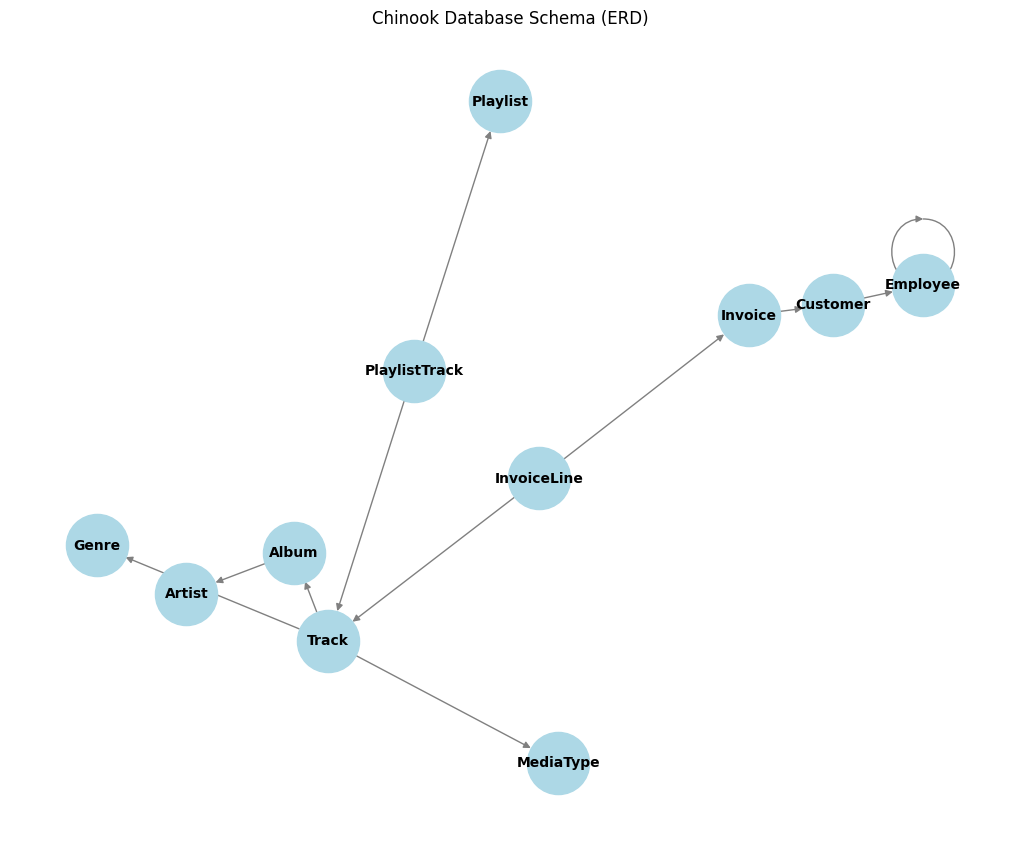

In [6]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("chinook.db")
cursor = conn.cursor()

# Function to get the foreign key relationships between tables
def get_foreign_keys(db_conn):
    cursor = db_conn.cursor()
    tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    foreign_keys = []

    for table_name, in tables:
        fk_info = cursor.execute(f"PRAGMA foreign_key_list({table_name});").fetchall()
        for fk in fk_info:
            # fk[2] is the referenced table, fk[3] is the referencing column, fk[4] is the referenced column
            foreign_keys.append((table_name, fk[2]))

    return foreign_keys

# Get tables and foreign keys
foreign_keys = get_foreign_keys(conn)

# Initialize the graph
G = nx.DiGraph()

# Add nodes (tables)
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
for table_name, in tables:
    G.add_node(table_name)

# Add edges (foreign key relationships)
for source, target in foreign_keys:
    G.add_edge(source, target)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positioning algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", arrows=True)

plt.title("Chinook Database Schema (ERD)")
plt.show()

# Close the database connection
conn.close()


### Description of the Code

This Python script visualizes the **Chinook** database schema as a directed graph (ERD) using the **networkx** library and **matplotlib** for visualization. It retrieves tables and their foreign key relationships from the SQLite database, generates a graph, and displays it with labels showing each table's columns.

#### Key Steps:
1. **Connecting to SQLite Database**: 
   - The script connects to the SQLite database (`chinook.db`).
   - It uses the `sqlite3` module to interact with the database.

2. **Fetching Foreign Key Relationships**:
   - The function `get_foreign_keys()` retrieves foreign key relationships for each table in the database using the `PRAGMA foreign_key_list()` command.
   - For each table, the foreign keys are extracted, and the relationships between tables are stored.

3. **Graph Initialization**:
   - A directed graph (`DiGraph`) is created using **networkx**.
   - The nodes represent the tables in the database, and the edges represent the foreign key relationships between them.

4. **Adding Table Data to Nodes**:
   - The script fetches the columns for each table using `PRAGMA table_info()`.
   - It concatenates the table name with its columns and adds this information as labels to the nodes.

5. **Graph Layout**:
   - A spring layout is applied to arrange the nodes with a spacing factor (`k=3.0`) for better visual clarity.
   - The nodes are drawn as square boxes with labels inside them. The size of the nodes is set to `20000` for better visibility.

6. **Drawing Labels**:
   - The labels inside the nodes are set to a font size of `8` to ensure they fit inside the larger nodes while still being readable.

7. **Edge and Node Styling**:
   - The edges (representing foreign key relationships) are drawn with arrows pointing from the source table to the target table.
   - The nodes are colored in light blue with black borders for contrast.

8. **Displaying the Graph**:
   - The graph is displayed using **matplotlib**, with a title at the top ("Chinook Database Schema (ERD)") to indicate the visualization's purpose.

9. **Closing the Connection**:
   - After the graph is drawn, the SQLite connection is closed to free up resources.

#### Result:
- The output is a visual representation of the **Chinook** database schema, with tables as nodes and foreign key relationships as directed edges.
- The graph shows a high-level overview of how the tables are interconnected, making it easier to understand the database structure.

### Libraries Used:
- **sqlite3**: For connecting to and querying the SQLite database.
- **networkx**: For creating and manipulating the graph structure of the database schema.
- **matplotlib**: For visualizing the graph.

This approach is useful for understanding the relationships and structure of a relational database, particularly in cases where the schema is large or complex.


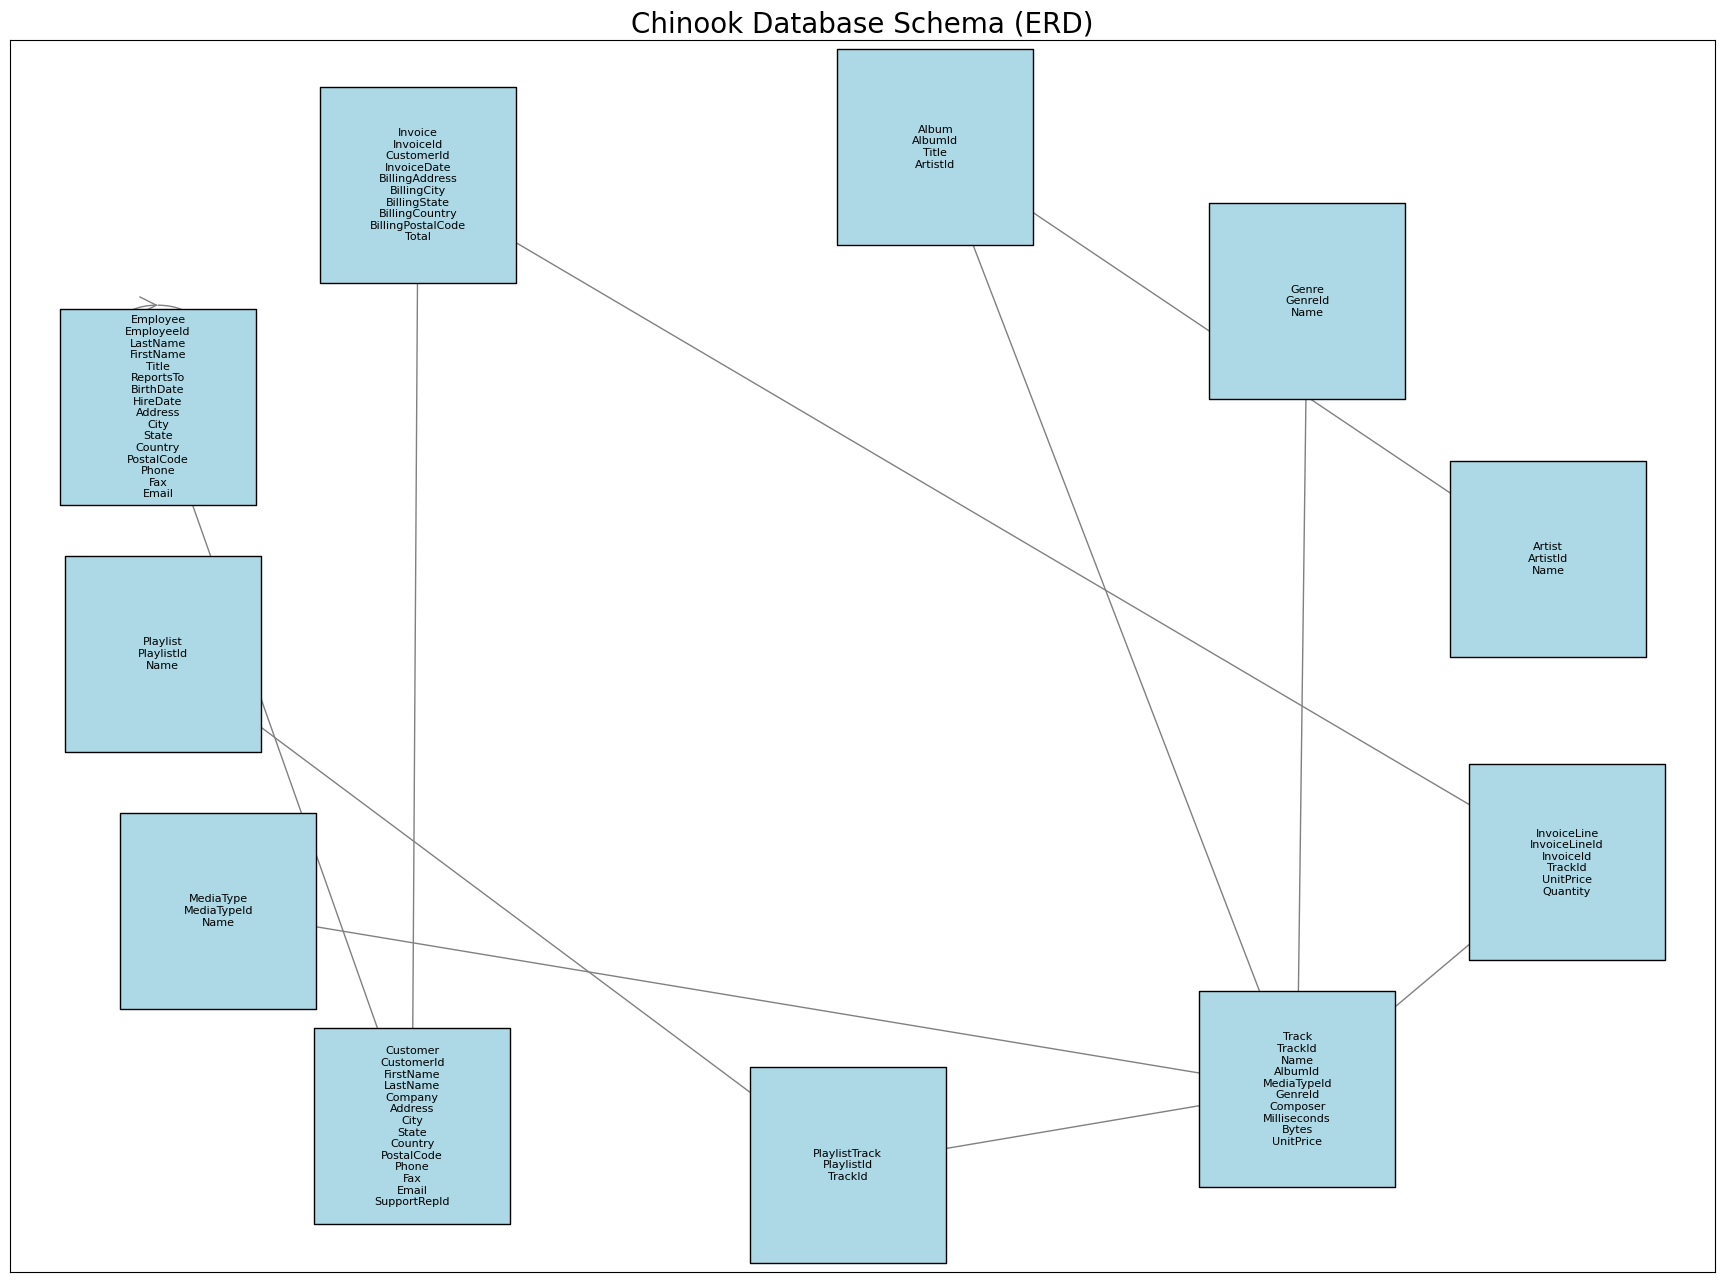

In [19]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_path = "chinook.db"  # Path to your SQLite file
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Function to retrieve foreign key relationships from SQLite database
def get_foreign_keys(connection):
    foreign_keys = []
    tables = connection.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    
    for (table_name,) in tables:
        fk_info = connection.execute(f"PRAGMA foreign_key_list({table_name});").fetchall()
        for fk in fk_info:
            # fk[2] is the referenced table name
            foreign_keys.append((table_name, fk[2]))
    
    return foreign_keys

# Retrieve tables and foreign key relationships
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
foreign_keys = get_foreign_keys(conn)

# Initialize the graph
G = nx.DiGraph()

# Add nodes (tables) and their columns to the graph
for (table_name,) in tables:
    columns = cursor.execute(f"PRAGMA table_info({table_name});").fetchall()
    column_names = [col[1] for col in columns]
    node_label = f"{table_name}\n" + "\n".join(column_names)
    G.add_node(table_name, label=node_label)

# Add edges (foreign key relationships)
for source, target in foreign_keys:
    G.add_edge(source, target)

# Drawing the graph with stacked node layout (using spring layout with adjusted spacing)
plt.figure(figsize=(22, 16))  # Increased figure size for more space
pos = nx.spring_layout(G, k=3.0, seed=42)  # Increased `k` for even more spacing between nodes

# Drawing nodes and edges with larger viewing boxes and enhanced font size
node_size = 20000  # Significantly larger node size
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="lightblue", edgecolors="k", node_shape="s")  # Square node shape

# Drawing labels with slightly larger font size (increased to 8)
nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]["label"] for node in G.nodes}, font_size=8, verticalalignment="center", horizontalalignment="center")

# Drawing edges with larger arrows
nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True, arrowstyle="->", arrowsize=30)

# Adjusting the title for better visibility
plt.title("Chinook Database Schema (ERD)", fontsize=20)
plt.show()

# Close the database connection
conn.close()